## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

## Load dataset with clusters

In [2]:
df = pd.read_csv('../data/processed/vendor_data_with_clusters.csv')

## Select features (same as clustering (Step 2))

In [3]:
features = [
    'Log_Award_Amount',
    'Award_Agency_Code',
    'Award_Type_Code',
    'Performance_Country_Code',
    'Performance_State_Code'
]

X = df[features]

## Normalize data

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Isolation Forest Model

In [5]:
iso = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = iso.fit_predict(X_scaled)

## Map: -1 → Anomaly, 1 → Normal

In [6]:
df['Anomaly'] = df['Anomaly'].map({1: 'Normal', -1: 'Anomaly'})

## Check result counts

In [7]:
print(df['Anomaly'].value_counts())


Anomaly
Normal     14250
Anomaly      750
Name: count, dtype: int64


## Visualize anomalies in PCA space (from clustering step)

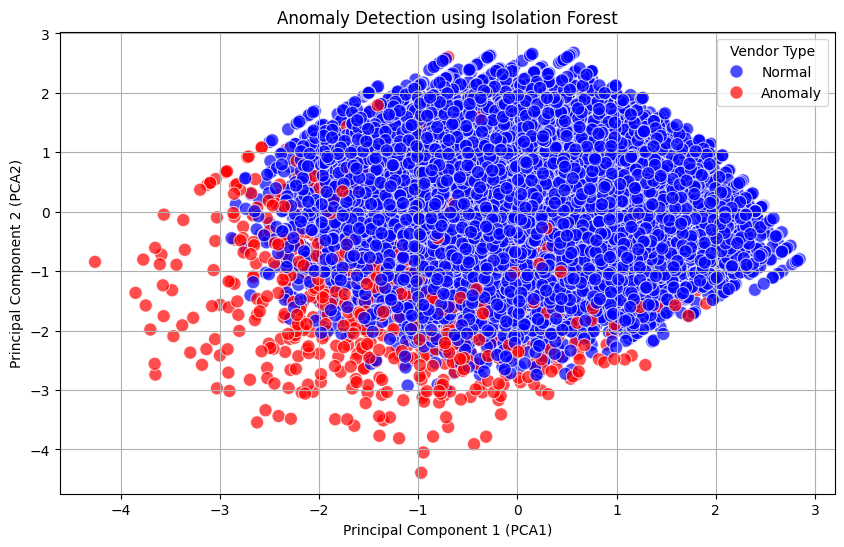

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,
    x='PCA1',
    y='PCA2',
    hue='Anomaly',
    palette={'Normal': 'blue', 'Anomaly': 'red'},
    s=90,
    alpha=0.7
)
plt.title("Anomaly Detection using Isolation Forest")
plt.xlabel("Principal Component 1 (PCA1)")
plt.ylabel("Principal Component 2 (PCA2)")
plt.legend(title='Vendor Type', loc='upper right')
plt.grid(True)
plt.show()

## Saved the new cleaned and processed (Anomalies) dataset 

In [9]:
df.to_csv('../data/processed/vendor_data_with_clusters_anomalies.csv', index=False)
print("✅ File saved with new cleaned and processed dataset.")

✅ File saved with new cleaned and processed dataset.


In [10]:
import sys
import os

# Add the src directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))


In [11]:
from anomaly_detection import detect_anomalies, add_anomaly_column, plot_anomaly_pca
from utils import show_award_distribution, save_df, summarize_clusters

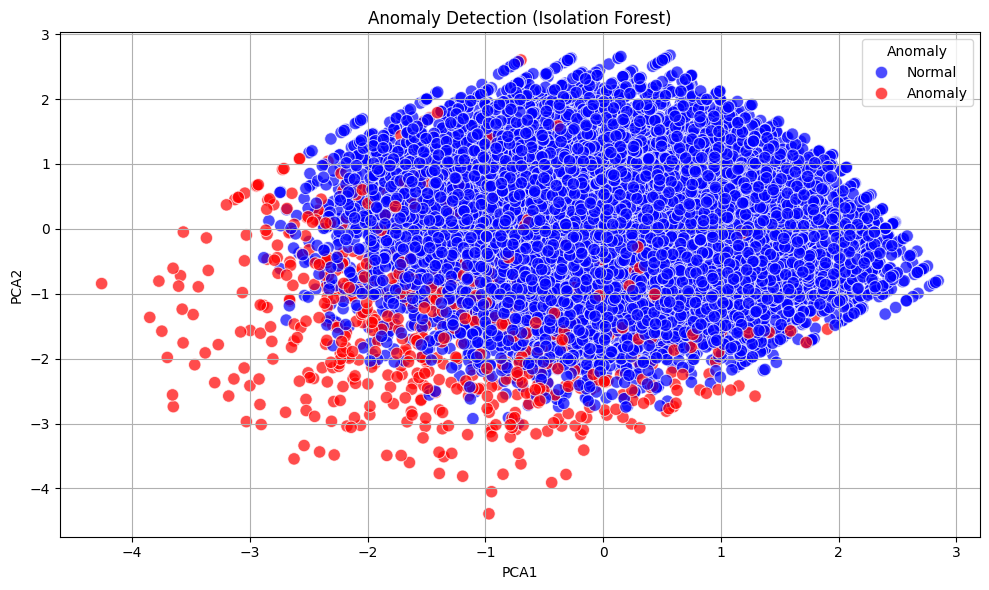

In [12]:
# Visualize
plot_anomaly_pca(df)

In [13]:
# Utility: Save results
save_df(df, "../data/processed/vendor_data_final.csv")

✅ Data saved to ../data/processed/vendor_data_final.csv
